In [83]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

pd.set_option('display.float_format', lambda x: f'{x:.2f}')
sns.set()

In [84]:
# Load and prepare data
df = (pd.read_excel('Life Expectancy.xlsx', header=2)
        .dropna(subset=['Life Expectancy', 'Total Expenditure'])
        .groupby('Country')
        .mean())

# Define high and low life expectancy categories
df['HighExpect'] = df['Life Expectancy'].map(lambda x: 1 if x > 70 else 0)

In [85]:
df['HighExpect'].describe()

count   181.00
mean      0.61
std       0.49
min       0.00
25%       0.00
50%       1.00
75%       1.00
max       1.00
Name: HighExpect, dtype: float64

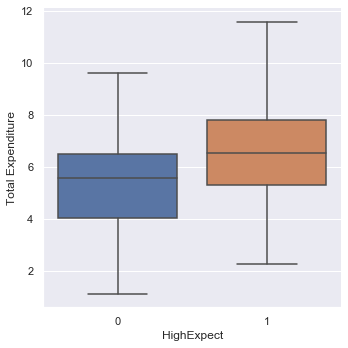

In [86]:
# Visualize percentage expenditure by life expectancy category
sns.catplot(x='HighExpect', y='Total Expenditure', kind='box', 
            showfliers=False, data=df)

In [87]:
model = sm.OLS(df['Total Expenditure'],
               sm.add_constant(df['HighExpect'])).fit(cov_type='HC0')

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Total Expenditure   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     12.81
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           0.000444
Time:                        19:34:42   Log-Likelihood:                -404.25
No. Observations:                 181   AIC:                             812.5
Df Residuals:                     179   BIC:                             818.9
Df Model:                           1                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4306      0.255     21.259      0.000       4.930       5.931
HighExpect     1.2101      0.338      3.579      0.000       0.547       1.873
==============================================================================
Omnibus:                       30.136   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.183
Skew:                           0.791   Prob(JB):                     1.41e-13
Kurtosis:                       5.312   Cond. No.                         2.95
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""